Reference Resource : https://www.kaggle.com/code/balavashan/weather-prediction-ensemble-methods

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('seattle-weather.csv')

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
import pandas_profiling as pp
df = data
report = pp.ProfileReport(df, title='Pandas Profile Report')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.shape

(1461, 6)

# Exploring Data Analysis

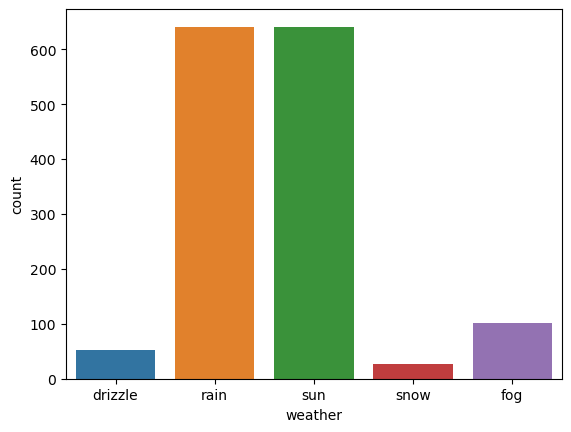

In [7]:
sns.countplot(data=data, x='weather')
plt.show()

In [8]:
countdrizzle = len(data[data['weather'] == 'drizzle'])
countrain = len(data[data['weather'] == 'rain'])
countsun = len(data[data['weather'] == 'sun'])
countsnow = len(data[data['weather'] == 'snow'])
countfog = len(data[data['weather'] == 'fog'])

print('Percent of rain is: {:.2f}%'.format(countrain / len(data['weather'])*100))
print('Percent of sun is: {:.2f}%'.format(countsun / len(data['weather'])*100))
print('Percent of fog is: {:.2f}%'.format(countfog / len(data['weather'])*100))
print('Percent of drizzle is: {:.2f}%'.format(countdrizzle / len(data['weather'])*100))
print('Percent of snow is: {:.2f}%'.format(countsnow / len(data['weather'])*100))


Percent of rain is: 43.87%
Percent of sun is: 43.81%
Percent of fog is: 6.91%
Percent of drizzle is: 3.63%
Percent of snow is: 1.78%


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


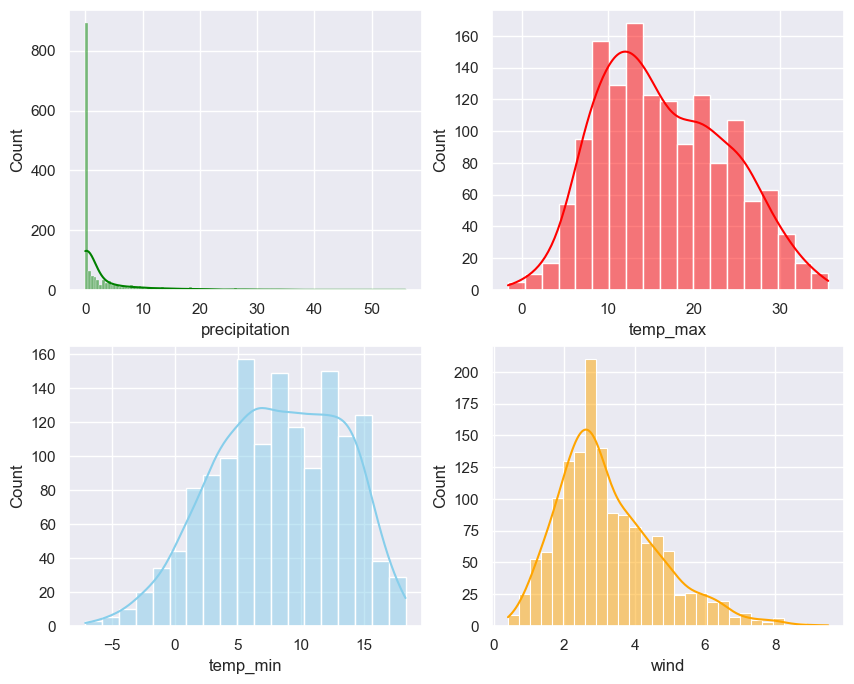

In [10]:
sns.set(style='darkgrid')
fig,axs = plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data, x='precipitation', kde=True, ax=axs[0,0], color='green')
sns.histplot(data=data, x='temp_max', kde=True, ax=axs[0,1], color='red')
sns.histplot(data=data, x='temp_min', kde=True, ax=axs[1,0], color='skyblue')
sns.histplot(data=data, x='wind', kde=True, ax=axs[1,1], color='orange')

plt.show()

# Find Outliers

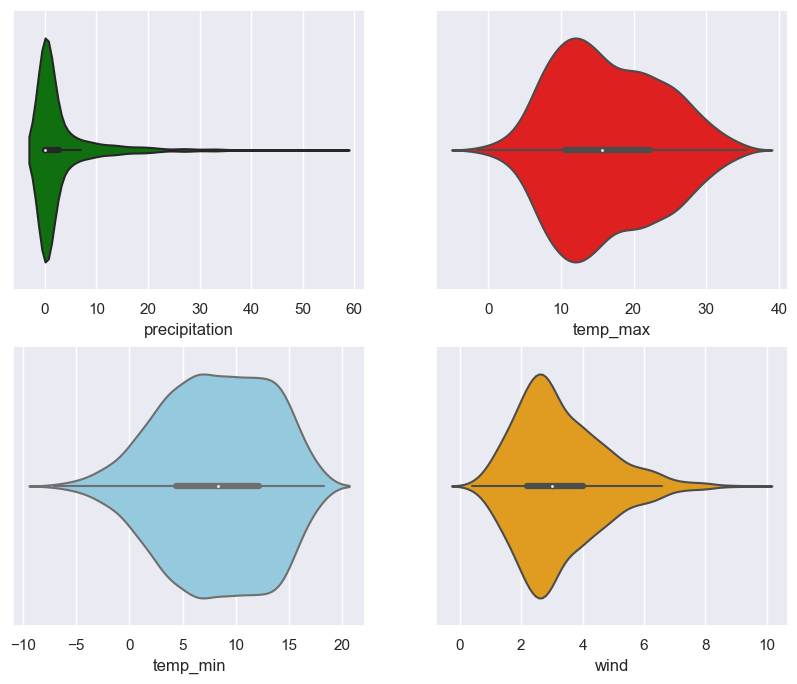

In [11]:
sns.set(style='darkgrid')

fig,axs = plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data, x='precipitation', kde=True, ax=axs[0,0], color='green')
sns.violinplot(data=data, x='temp_max', kde=True, ax=axs[0,1], color='red')
sns.violinplot(data=data, x='temp_min', kde=True, ax=axs[1,0], color='skyblue')
sns.violinplot(data=data, x='wind', kde=True, ax=axs[1,1], color='orange')

plt.show()

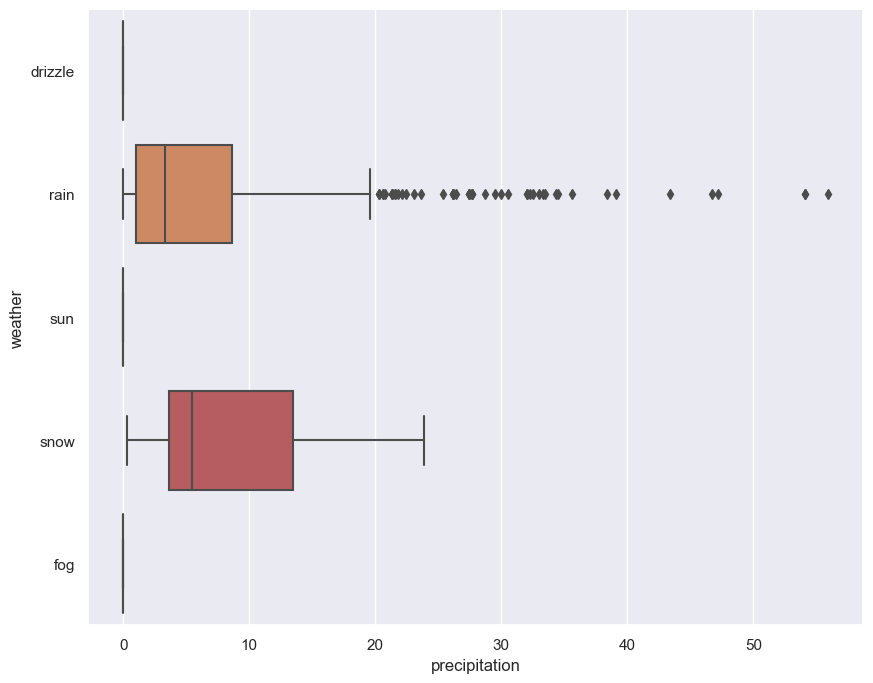

In [12]:
# seems rain have many outliers(points)
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='precipitation', y='weather')
plt.show()

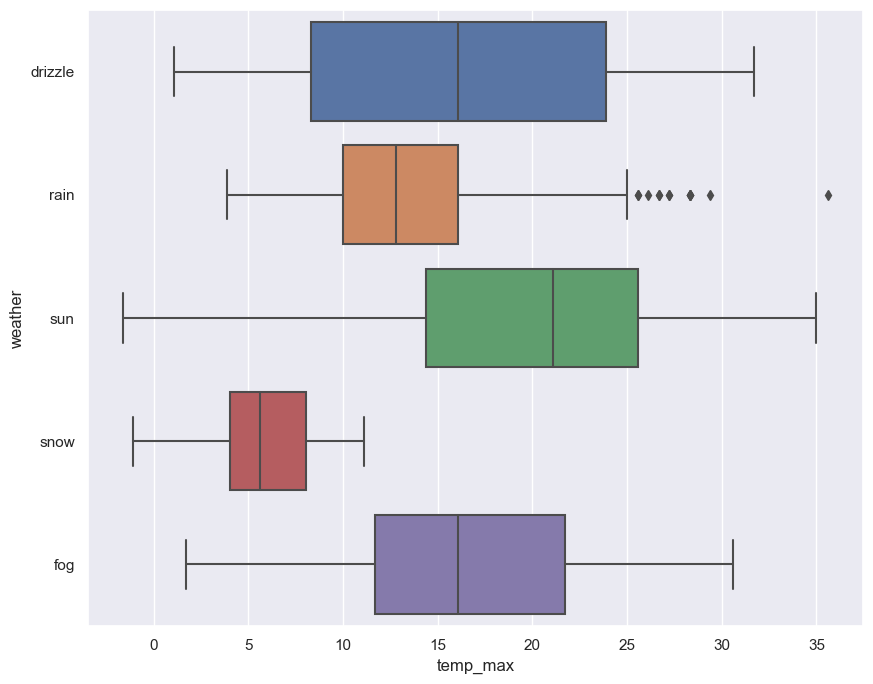

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='temp_max', y='weather')
plt.show()

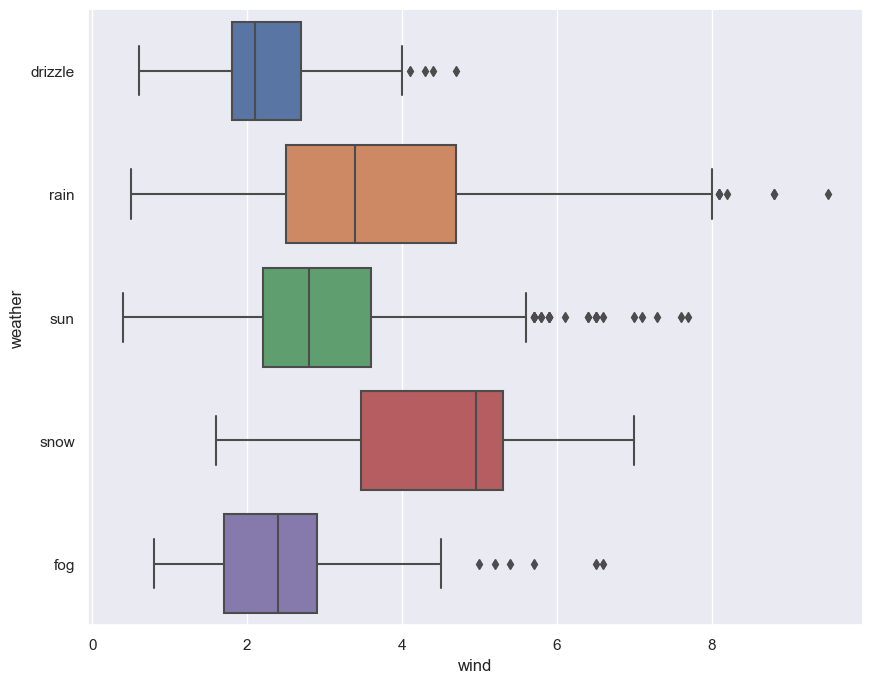

In [14]:
# almost evert data have outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='wind', y='weather')
plt.show()

<Axes: xlabel='temp_min', ylabel='weather'>

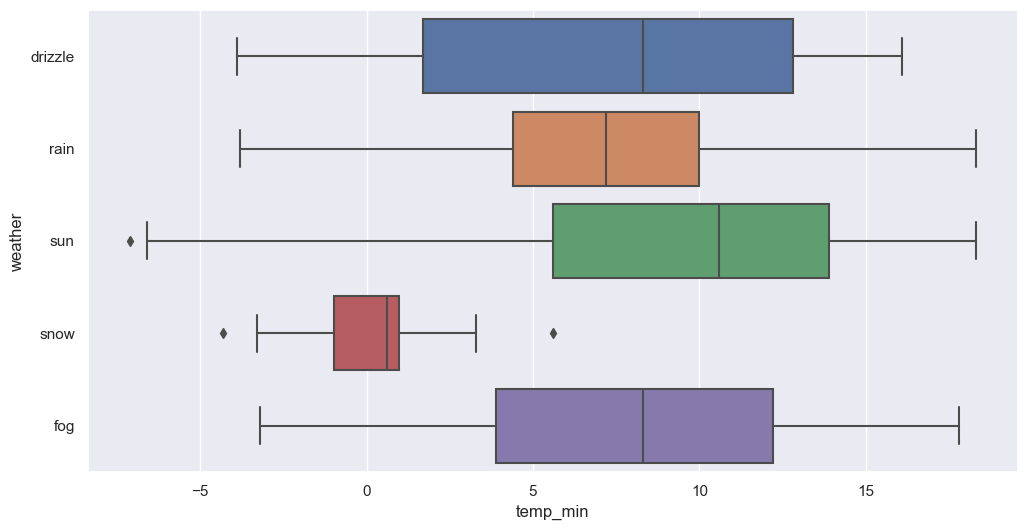

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='temp_min', y='weather')

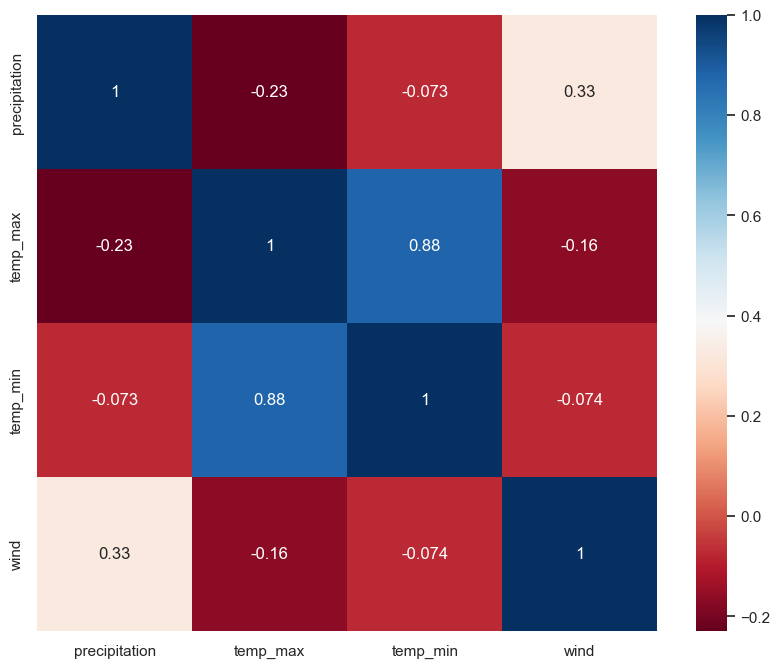

In [16]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data=data.corr(), cmap='RdBu', annot=True)
plt.show()

Pearson correlation: -0.22855481643297046
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


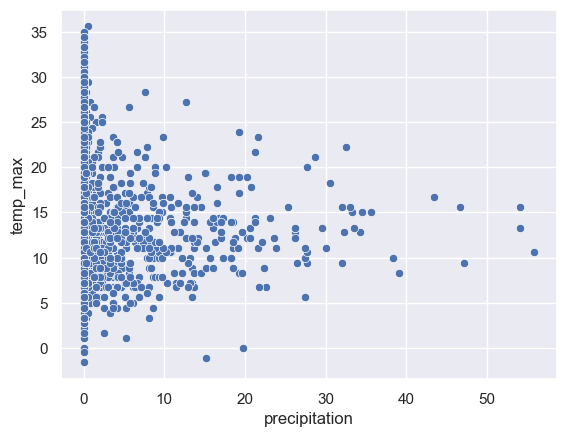

In [17]:
# Pearson correlation是負的,代表呈現負相關,降水量高,溫度低,vice versa
# 如果p value < 0.05, 代表差異顯著

sns.scatterplot(data=data, x='precipitation', y='temp_max')

print('Pearson correlation:', data['precipitation'].corr(data['temp_max']))
print('T Test and P value:', stats.ttest_ind(data['precipitation'], data['temp_max']))

Pearson correlation: -0.16485663487495486
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


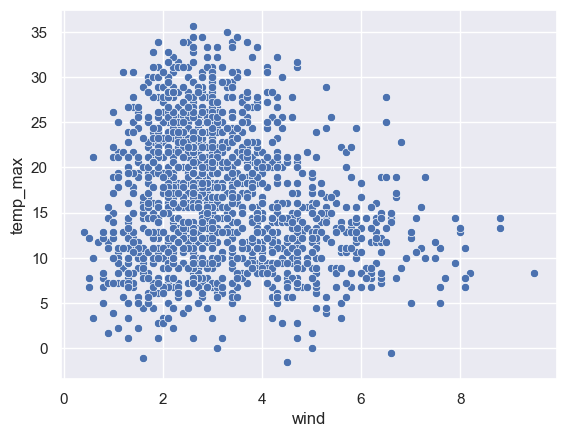

In [18]:
sns.scatterplot(data=data, x='wind', y='temp_max')

print('Pearson correlation:', data['wind'].corr(data['temp_max']))
print('T Test and P value:', stats.ttest_ind(data['wind'], data['temp_max']))

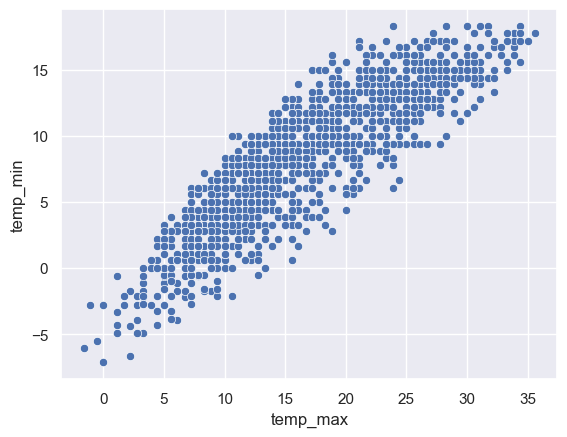

In [19]:
sns.scatterplot(data=data, x ='temp_max', y='temp_min')
plt.show()

# Data Preprocessing

In [20]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Remove Outliers

In [21]:
# Date is unnecessary data in this dataset
df = data.drop('date',axis=1)

def remove_outliers(df):
    columns = df.columns
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        return df

In [22]:
remove_outliers(df)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [23]:
# reduce skewness
df['precipitation'] = np.sqrt(df['precipitation'])
df['wind'] = np.sqrt(df['wind'])

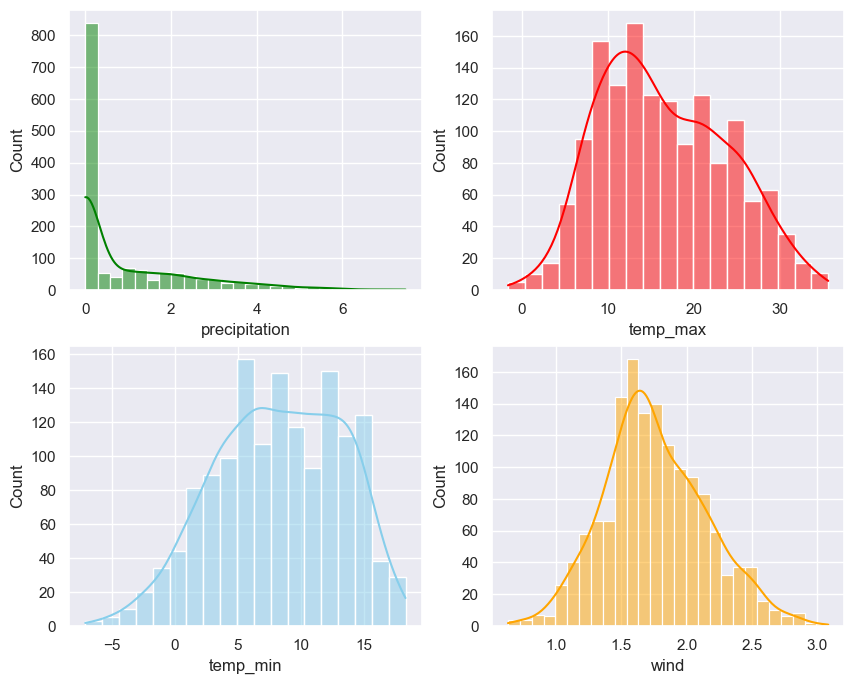

In [24]:
fig,axs = plt.subplots(2,2,figsize=(10,8))

sns.histplot(data=df, x='precipitation', kde=True, ax=axs[0,0], color='green')
sns.histplot(data=df, x='temp_max', kde=True, ax=axs[0,1], color='red')
sns.histplot(data=df, x='temp_min', kde=True, ax=axs[1,0], color='skyblue')
sns.histplot(data=df, x='wind', kde=True, ax=axs[1,1], color='orange')
plt.show()

In [25]:
df.head(20)

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain
7,0.000000,10.0,2.8,1.414214,sun
8,2.073644,9.4,5.0,1.843909,rain
9,1.000000,6.1,0.6,1.843909,rain


In [26]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
# use label encoder to convert catecory to numeric 
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [28]:
df.head(20)

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2
7,0.000000,10.0,2.8,1.414214,4
8,2.073644,9.4,5.0,1.843909,2
9,1.000000,6.1,0.6,1.843909,2


In [29]:
df['weather'].unique()

array([0, 2, 4, 3, 1])

# Model Training

In [30]:
# Split into features and target
X = df.iloc[:, :-1].values.astype(int)
y = df.iloc[:,-1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### KNN

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:72.70%


In [33]:
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.10      0.14      0.12         7
           1       0.08      0.07      0.07        15
           2       0.82      0.85      0.84       128
           3       0.25      1.00      0.40         2
           4       0.77      0.71      0.74       141

    accuracy                           0.73       293
   macro avg       0.40      0.55      0.43       293
weighted avg       0.74      0.73      0.73       293



### SVC

In [34]:
svc = SVC()
svc.fit(X_train, y_train)
print('SVC Accuracy:{:.2f}%'.format(svc.score(X_test, y_test)*100))

SVC Accuracy:80.20%


In [35]:
y_pred = svc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.84      0.87      0.85       129
           3       0.00      0.00      0.00         0
           4       0.95      0.75      0.84       164

    accuracy                           0.80       293
   macro avg       0.36      0.32      0.34       293
weighted avg       0.90      0.80      0.84       293



### Gradient Boosting

In [36]:
# GBC = GradientBoostingClassifier()

# param_grid = {'learning_rate':[0.1,0.2,0.3,0.4], 
             # 'n_estimators':[100,200,300,400], 
             # 'min_samples_split':[2,3,4,5]}

# GBC_grid = GridSearchCV(GBC, param_grid, cv=3, scoring='accuracy')
# GBC_grid.fit(X_train, y_train)
# GBC_grid.best_params_

In [37]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_split=3,random_state=2)
GBC.fit(X_train, y_train)
print('GBC Accuracy:{:.2f}%'.format(GBC.score(X_test, y_test)*100))

GBC Accuracy:80.20%


In [38]:
y_pred = GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.08      0.14      0.11         7
           2       0.79      0.95      0.86       110
           3       0.62      0.71      0.67         7
           4       0.95      0.73      0.83       169

    accuracy                           0.80       293
   macro avg       0.49      0.51      0.49       293
weighted avg       0.86      0.80      0.82       293



### RandomForest

In [39]:
# rfc = RandomForestClassifier(random_state=2)

# param_grid = {'n_estimators':[100,200,300,400], 'criterion':['gini','entropy'], 'max_depth':[2,3,4,5],
          # 'min_samples_split':[2,3,4,5]}

# rfc_grid = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
# rfc_grid.fit(X_train, y_train)
# rfc_grid.best_params_

In [40]:
rfc = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=4, n_estimators=400,
                            random_state=2, n_jobs=-1)
rfc.fit(X_train,y_train)

print('RandomForest Accuracy:{:.2f}%'.format(rfc.score(X_test, y_test)*100))

RandomForest Accuracy:81.57%


In [41]:
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.78      0.97      0.87       107
           3       0.62      1.00      0.77         5
           4       1.00      0.72      0.84       181

    accuracy                           0.82       293
   macro avg       0.48      0.54      0.49       293
weighted avg       0.91      0.82      0.85       293



### XGBoost

In [42]:
# xgb = XGBClassifier()

# param_grid = {'n_estimators':[6,7,8,9,10],'learning_rate':[0.01,0.1,0.2,0.3,0.4],
            #   'max_depth':[5,6,7,8,9],'colsample_bytree':[0.7,0.8,0.9,1]}

# xgb_grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
# xgb_grid.fit(X_train, y_train)
# xgb_grid.best_params_

In [43]:
xgb = XGBClassifier(n_estimators=9, learning_rate=0.01, max_depth=6, colsample_bytree=0.8, random_state=2)
xgb.fit(X_train, y_train)
print('XGB Accuracy:{:.2f}%'.format(xgb.score(X_test, y_test)*100))

XGB Accuracy:82.25%


In [44]:
y_pred = xgb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.82      0.95      0.88       115
           3       0.75      1.00      0.86         6
           4       0.97      0.73      0.83       172

    accuracy                           0.82       293
   macro avg       0.51      0.54      0.51       293
weighted avg       0.91      0.82      0.85       293



In [45]:
# we can see above and know, 0=drizzle, 2=rain, 3=snow, 4=sun
input = [[0.02,5.2,1.1,1.96052]]
output = xgb.predict(input)

print('The weather is:')
if (output == 0):
    print('Drizzle')
elif (output == 2):
    print('Rain')
elif (output == 3):
    print('Snow')
else:
    print('Sun')

The weather is:
Sun
